In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [119]:
organism = "ecoli"

In [123]:
from utils import *

In [124]:
edges=pd.read_csv("data/"+organism+"/edgelist_biogrid_name.csv", sep=",", header=None)

In [126]:
edges = edges.drop_duplicates()

In [127]:
edges.head()

,0,1
0,minC,minC
1,ffh,ftsY
2,yfbW,sgrS
3,yeiW,sgrS
4,ecnA,sgrS


In [128]:
def updateGeneIDs(gene_ID_file):
    df = pd.read_csv(gene_ID_file, sep="\t", header=None, skiprows=1)
    # Load gold standard relation file
    df.iloc[:,0] = df.iloc[:,0].apply(lambda x: x.replace('g', '').replace('G', '')).astype(int)
    df.iloc[:,0] = df.iloc[:,0].apply(lambda x: int(x) - 1)
    return df

In [129]:
gene_ids=updateGeneIDs("data/"+organism+"/gene_ids.tsv")

In [130]:
gene_ids.columns = ['id','gene']

In [131]:
def geneName_to_id(edgelist, gene_ids):
    gene_ids.columns = ['id','gene']
    merged_1 = pd.merge(edgelist, gene_ids, left_on=0, right_on="gene")
    merged = pd.merge(merged_1, gene_ids, left_on=1, right_on="gene")
    merged = merged.iloc[:,[2,4]]
    return merged

In [132]:
def getGeneName(gene_ids=gene_ids, index=0):
    return gene_ids.loc[index,'gene']

In [133]:
def getGeneID(df=gene_ids, geneName=""):
    return int(df.loc[df.gene==geneName,'id'])

In [134]:
merged = geneName_to_id(edges, gene_ids)

In [135]:
G = nx.from_edgelist(merged.values)

In [136]:
fp = pd.read_csv("data/"+organism+"/"+organism+"_prediction_false_positives.txt", sep="\t", skiprows=1, header=None)

In [137]:
fp['common_neighbors'] = 0
fp['A_neighbors'] = 0
fp['B_neighbors'] = 0

In [138]:
for i in range(fp.shape[0]):
    u = getGeneID(gene_ids, fp.iloc[i,0])
    v = getGeneID(gene_ids, fp.iloc[i,1])
    if u in G.nodes() and v in G.nodes():
        fp.loc[i, 'common_neighbors'] = len(list(nx.common_neighbors(G, u, v)))
        fp.loc[i, 'A_neighbors'] = len(list(G.neighbors(u)))
        fp.loc[i, 'B_neighbors'] = len(list(G.neighbors(v)))

In [139]:
fp.head()

,0,1,2,common_neighbors,A_neighbors,B_neighbors
0,gspD,fimD,0.999829,58,253,176
1,yhcB,fecE,0.999460,142,467,237
2,ubiF,mltB,0.999434,91,280,335
3,rpmA,ackA,0.999353,107,207,427
4,ubiE,secG,0.999194,191,486,318


In [140]:
fp_sorted = fp.sort_values(by=2, ascending=False)

In [141]:
fp_sorted.columns = ['Gene A', 'Gene B', 'Probability', 'Common neighbors', 'Num of neighbors A',  'Num of neighbors B']

In [142]:
fp_sorted['Probability'] = fp_sorted['Probability'].apply(lambda x: round(x, 5))

In [143]:
fp_sorted.to_csv(organism+"_common_neighbors for false positives.txt", header=True, index=False, sep='\t')

In [144]:
fp_sorted.sort_values(by='Common neighbors', ascending=False)

,Gene A,Gene B,Probability,Common neighbors,Num of neighbors A,Num of neighbors B
22,damX,fliL,0.99765,320,565,510
104,acpP,yhjD,0.98784,272,450,556
16,ybeX,cydA,0.99824,248,511,323
4,ubiE,secG,0.99919,191,486,318
85,bcsB,fliL,0.99146,175,260,510
12,iscS,fabD,0.99875,174,533,306
32,gspK,sapF,0.99659,161,325,386
17,pta,nanA,0.99798,155,325,327
119,mscL,ldcA,0.98510,154,355,306
39,ubiE,btuB,0.99593,148,486,235


In [145]:
import math

In [146]:
fp_sorted['prob_round'] = fp_sorted['Probability'].apply(lambda x: math.floor(x*10)/10)

In [147]:
fp_sorted.columns

Index(['Gene A', 'Gene B', 'Probability', 'Common neighbors',
       'Num of neighbors A', 'Num of neighbors B', 'prob_round'],
      dtype='object')

In [148]:
df_bar = fp_sorted.loc[:,['Common neighbors', 'prob_round']]

In [149]:
fp_sorted.head()

,Gene A,Gene B,Probability,Common neighbors,Num of neighbors A,Num of neighbors B,prob_round
0,gspD,fimD,0.99983,58,253,176,0.9
1,yhcB,fecE,0.99946,142,467,237,0.9
2,ubiF,mltB,0.99943,91,280,335,0.9
3,rpmA,ackA,0.99935,107,207,427,0.9
4,ubiE,secG,0.99919,191,486,318,0.9


In [150]:
df_bar = df_bar.groupby(['prob_round'])['Common neighbors'].mean()

In [151]:
df_bar.index

Float64Index([0.5, 0.6, 0.7, 0.8, 0.9], dtype='float64', name='prob_round')

In [152]:
df_bar

prob_round
0.5     6.182432
0.6     9.136000
0.7    15.016949
0.8    26.420168
0.9    58.135734
Name: Common neighbors, dtype: float64

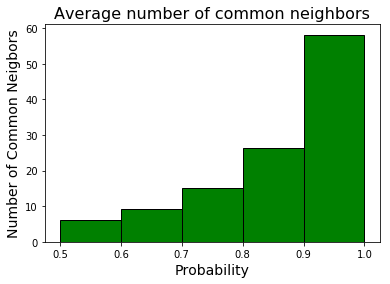

In [156]:
# Values of each group
bars1 = df_bar.values
 
# Heights of bars1 + bars2 (TO DO better)
bars = [1, 1, 1, 1, 1]
 
# The position of the bars on the x-axis
r = [1,2,3,4,5]
ticks = [0.5,1.5,2.5,3.5,4.5,5.5]
# Names of group and bar width
names = df_bar.index
barWidth = 1
 
# Create plots with pre-defined labels.
# Alternatively, you can pass labels explicitly when calling `legend`.
# plt.figure(figsize=(12, 5))
fig, ax = plt.subplots()
# Create brown bars
ax.bar(r, bars1, color='green', edgecolor='black', width=barWidth)

tick_names = [0.5,0.6,0.7,0.8,0.9,1.0]
# Custom X axis
plt.xticks(ticks, tick_names)
plt.xlabel("Probability", fontsize=14)
plt.ylabel("Number of Common Neigbors", fontsize=14)
plt.title('Average number of common neighbors', fontsize=16)
# Now add the legend with some customizations.
# legend = ax.legend(loc='upper left')

# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
# frame = legend.get_frame()
# frame.set_facecolor('0.90')
plt.savefig(organism +'_common_neighbors_per_bin.eps', dpi=1200)
# Show graphic
plt.show()

In [30]:
common_neighbors_50 = fp_sorted.loc[fp_sorted['prob_round']==0.5,'Common neighbors']
common_neighbors_60 = fp_sorted.loc[fp_sorted['prob_round']==0.6,'Common neighbors']
common_neighbors_70 = fp_sorted.loc[fp_sorted['prob_round']==0.7,'Common neighbors']
common_neighbors_80 = fp_sorted.loc[fp_sorted['prob_round']==0.8,'Common neighbors']
common_neighbors_90 = fp_sorted.loc[fp_sorted['prob_round']==0.9,'Common neighbors']

In [31]:
from scipy import stats

In [32]:
stats.ttest_ind(common_neighbors_50, common_neighbors_60)

Ttest_indResult(statistic=-1.8250263782616862, pvalue=0.06909779329062621)

In [33]:
stats.ttest_ind(common_neighbors_50, common_neighbors_70)

Ttest_indResult(statistic=-4.457321984875675, pvalue=1.2277650086550268e-05)

In [34]:
stats.ttest_ind(common_neighbors_50, common_neighbors_80)

Ttest_indResult(statistic=-7.8999316462589215, pvalue=7.477594077700487e-14)

In [35]:
stats.ttest_ind(common_neighbors_50, common_neighbors_90)

Ttest_indResult(statistic=-14.285610643299862, pvalue=3.772074071702287e-39)

In [36]:
stats.ttest_ind(common_neighbors_60, common_neighbors_70)

Ttest_indResult(statistic=-2.5509525429949624, pvalue=0.011362160802760847)

In [37]:
stats.ttest_ind(common_neighbors_60, common_neighbors_80)

Ttest_indResult(statistic=-5.952857631561366, pvalue=9.202213146387224e-09)

In [38]:
stats.ttest_ind(common_neighbors_60, common_neighbors_90)

Ttest_indResult(statistic=-12.29712211178126, pvalue=1.9642509067946947e-30)

In [39]:
stats.ttest_ind(common_neighbors_70, common_neighbors_80)

Ttest_indResult(statistic=-3.5413659750965913, pvalue=0.0004798922347920202)

In [40]:
stats.ttest_ind(common_neighbors_70, common_neighbors_90)

Ttest_indResult(statistic=-10.369285843394346, pvalue=7.426488232095973e-23)

In [41]:
stats.ttest_ind(common_neighbors_80, common_neighbors_90)

Ttest_indResult(statistic=-7.4268960405971685, pvalue=5.148145969125578e-13)